In [1]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.log_device_placement = True
sess = tf.Session(config=config)
set_session(sess)

Using TensorFlow backend.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation
from keras.layers.normalization import BatchNormalization
from keras.callbacks import TensorBoard

In [3]:
train = pd.read_csv('Fashion_MNIST/fashion-mnist_train.csv')
test = pd.read_csv('Fashion_MNIST/fashion-mnist_test.csv')
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_data = np.array(train, dtype='float32')
test_data = np.array(test, dtype='float32')

x_train = train_data[:, 1:]/255
y_train = train_data[:, 0]

x_test = test_data[:, 1:]/255
y_test = test_data[:, 0]

In [5]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=2018)

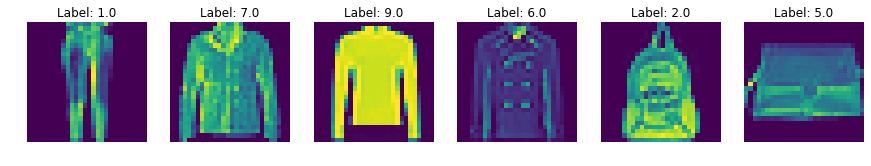

In [6]:
idx = [0, 100, 250, 500, 800, 1500]
N = len(idx)
plt.figure(figsize=(15,15))
for i in range(N):
    plt.subplot(1, N, i+1)
    image = x_train[i, :].reshape((28, 28))
    plt.imshow(image)
    plt.title('Label: {}'.format(y_train[idx[i]]))
    plt.axis('off')
plt.show()

In [7]:
im_rows = 28
im_cols = 28
batch_size = 512
im_shape = (im_rows, im_cols, 1)

x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_val = x_val.reshape(x_val.shape[0], *im_shape)

print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print('x_val shape: {}'.format(x_val.shape))

x_train shape: (48000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
x_val shape: (12000, 28, 28, 1)


In [8]:
# convert class vectors to binary class matrices
# y_train = keras.utils.to_categorical(y_train, 10)
# y_test = keras.utils.to_categorical(y_test, 10)
# y_val = keras.utils.to_categorical(y_val, 10)

In [9]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
# Fully connected layer

model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(0.25))
model.add(Dense(10))

model.add(Activation('softmax'))

In [10]:
tensorboard = TensorBoard(
    log_dir='logs/{}'.format('cnn_1layer'),
    write_graph=True,
    write_grads=True,
    histogram_freq=1,
    write_images=True,
)

In [11]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=10, verbose=1, 
             validation_data=(x_val, y_val), callbacks=[tensorboard])

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 56us/step - loss: 0.8369 - acc: 0.6930 - val_loss: 0.5030 - val_acc: 0.8110
Epoch 2/10
48000/48000 [==============================] - 1s 29us/step - loss: 0.4718 - acc: 0.8228 - val_loss: 0.4200 - val_acc: 0.8416
Epoch 3/10
48000/48000 [==============================] - 1s 31us/step - loss: 0.3891 - acc: 0.8575 - val_loss: 0.3785 - val_acc: 0.8629
Epoch 4/10
48000/48000 [==============================] - 1s 30us/step - loss: 0.3307 - acc: 0.8790 - val_loss: 0.3344 - val_acc: 0.8779
Epoch 5/10
48000/48000 [==============================] - 1s 31us/step - loss: 0.2978 - acc: 0.8906 - val_loss: 0.2964 - val_acc: 0.8890
Epoch 6/10
48000/48000 [==============================] - 1s 30us/step - loss: 0.2744 - acc: 0.8992 - val_loss: 0.2696 - val_acc: 0.9023
Epoch 7/10
48000/48000 [==============================] - 1s 31us/step - loss: 0.2456 - acc: 0.9095 - val_loss: 0.2643 - val_acc